In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
train_data = pd.read_csv("./data/train.csv")

In [2]:
import numpy as np
import matplotlib as mpl

print (mpl.matplotlib_fname())
# 복사해서 파일을 열어
#font.family:  sans-serif을 font.family:  Malgun Gothic 로 수정

/Users/syshin/miniforge3/envs/tomato/lib/python3.11/site-packages/matplotlib/mpl-data/matplotlibrc


In [3]:
# 파이썬 시각화 패키지 불러오기
import matplotlib.pyplot as plt
%matplotlib inline

# 사용자 운영체제 확인
import os
os.name

# 운영체제별 한글 폰트 설정
if os.name == 'posix': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif os.name == 'nt': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정

# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

In [4]:
# 파이썬 시각화 패키지 불러오기
import matplotlib.pyplot as plt
%matplotlib inline

# 사용자 운영체제 확인
import platform
platform.system()

# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정

# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

In [5]:
# 1. Basic Statistics
print(train_data.describe())
print(train_data.info())

       추석까지 남은 기간(주)          가격(원)      프로모션 여부          수요량
count    5872.000000    5872.000000  5872.000000  5872.000000
mean        0.983311  157896.287466     0.085320   264.313692
std         0.814237   75806.989671     0.279381   338.789214
min         0.000000   38000.000000     0.000000    13.000000
25%         0.000000  112000.000000     0.000000    54.000000
50%         1.000000  139000.000000     0.000000   136.000000
75%         2.000000  212000.000000     0.000000   350.000000
max         2.000000  340000.000000     1.000000  4455.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5872 entries, 0 to 5871
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             5872 non-null   object
 1   추석까지 남은 기간(주)  5872 non-null   int64 
 2   쇼핑몰 구분         5872 non-null   object
 3   가격(원)          5872 non-null   int64 
 4   프로모션 여부        5872 non-null   int64 
 5   도시 유형          5872 non-null 

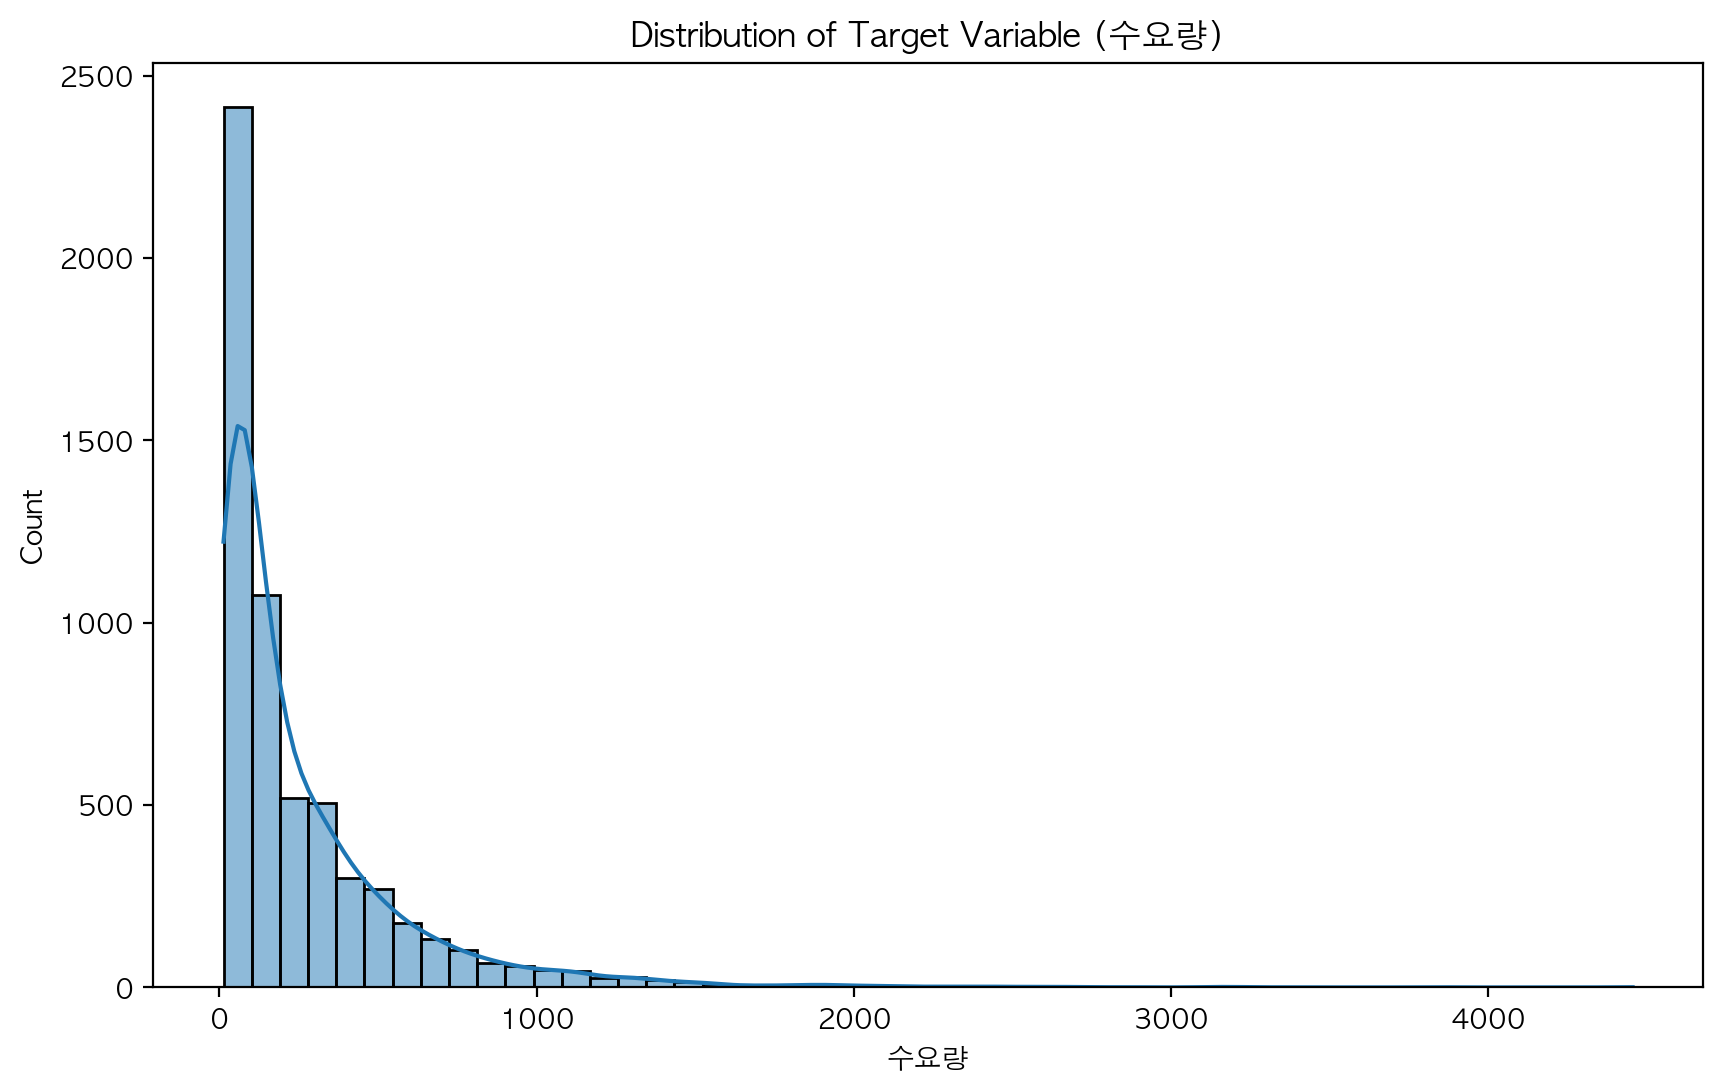

In [6]:
# 2. Distribution of Target Variable
plt.figure(figsize=(10, 6))
sns.histplot(train_data["수요량"], bins=50, kde=True)
plt.title("Distribution of Target Variable (수요량)")
plt.show()

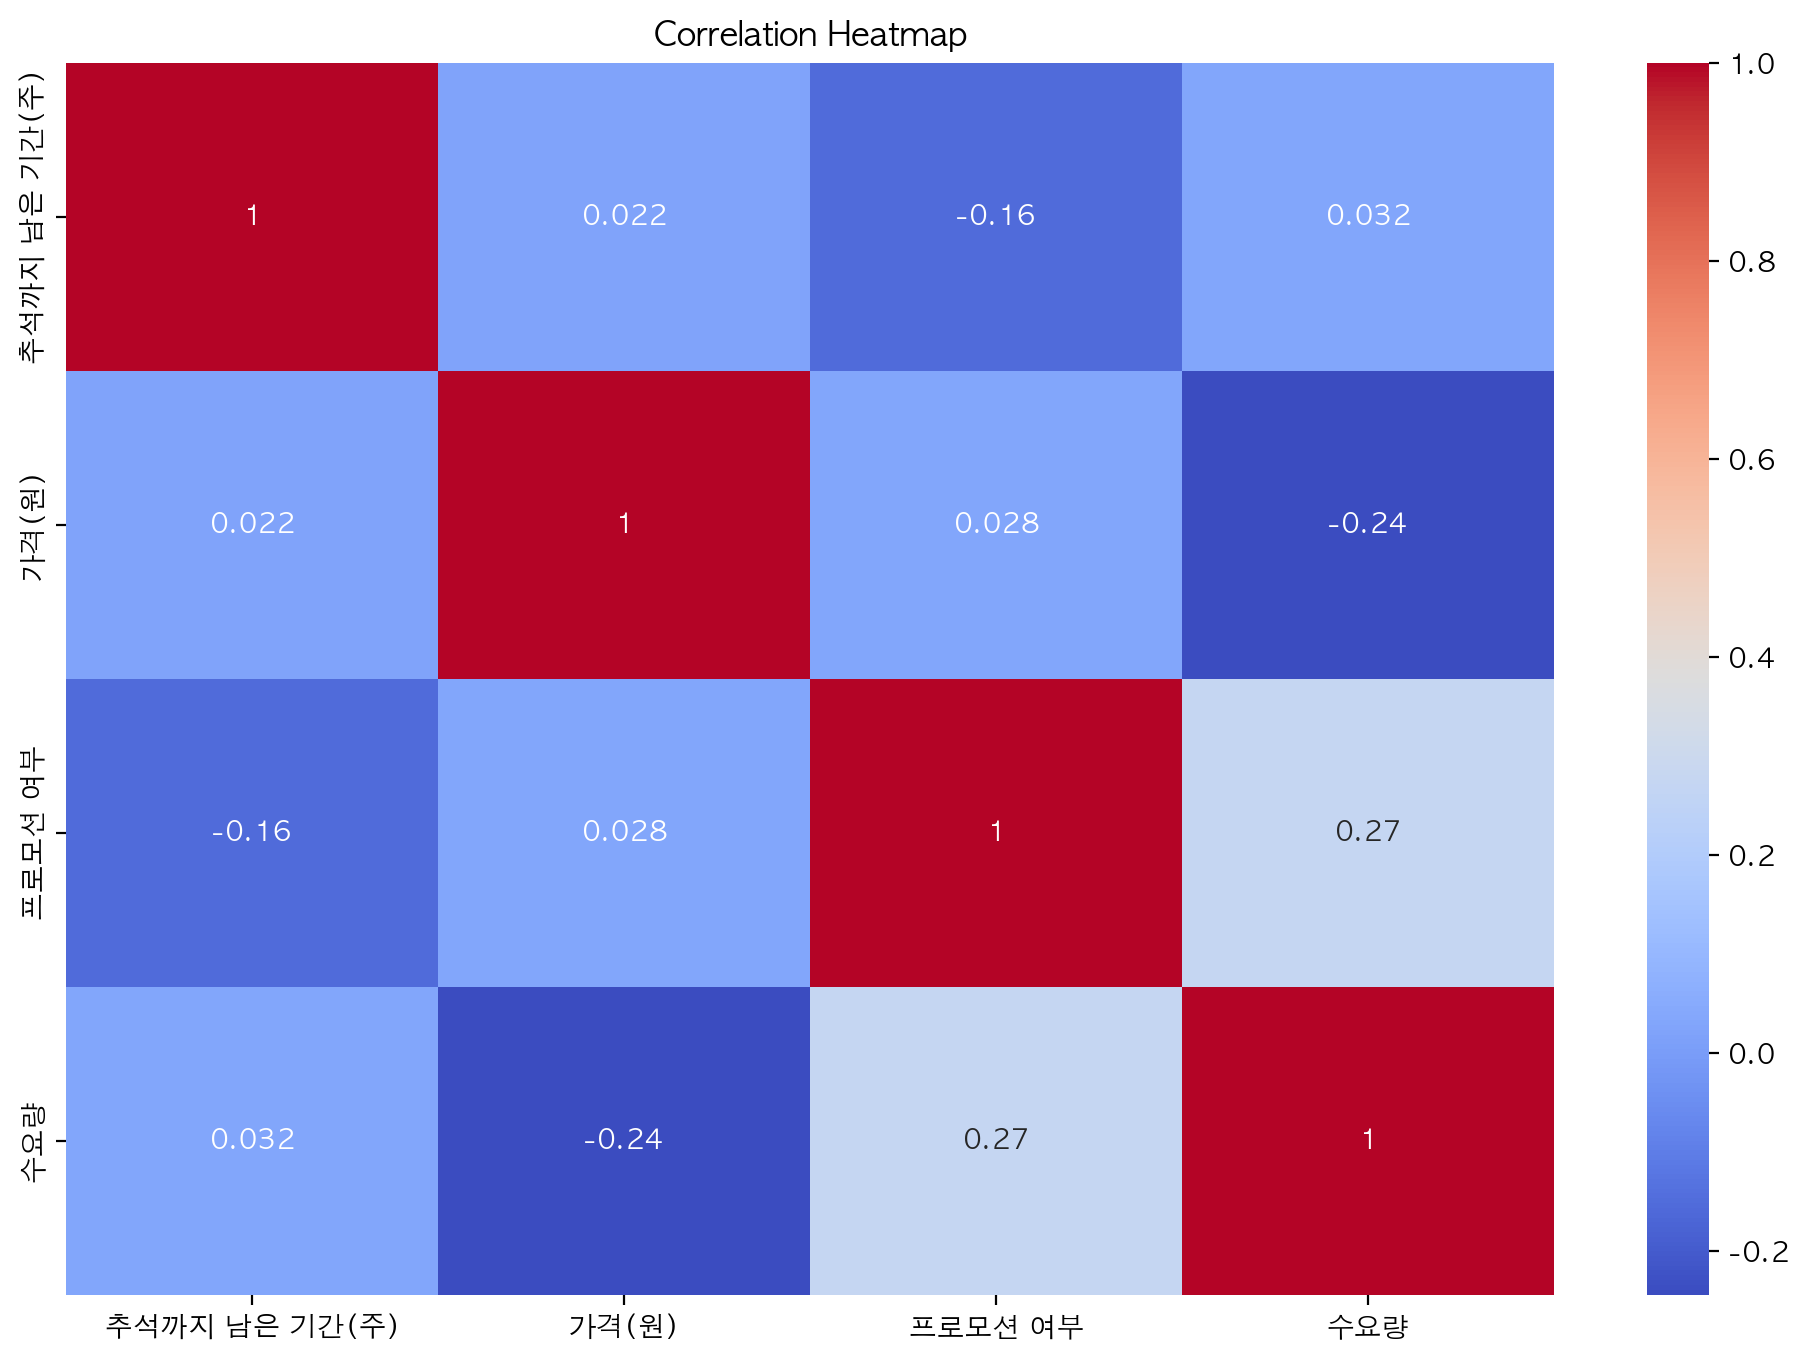

In [8]:
# 3. Correlation Heatmap
# Exclude non-numeric columns
numeric_data = train_data.select_dtypes(include=[np.number])

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


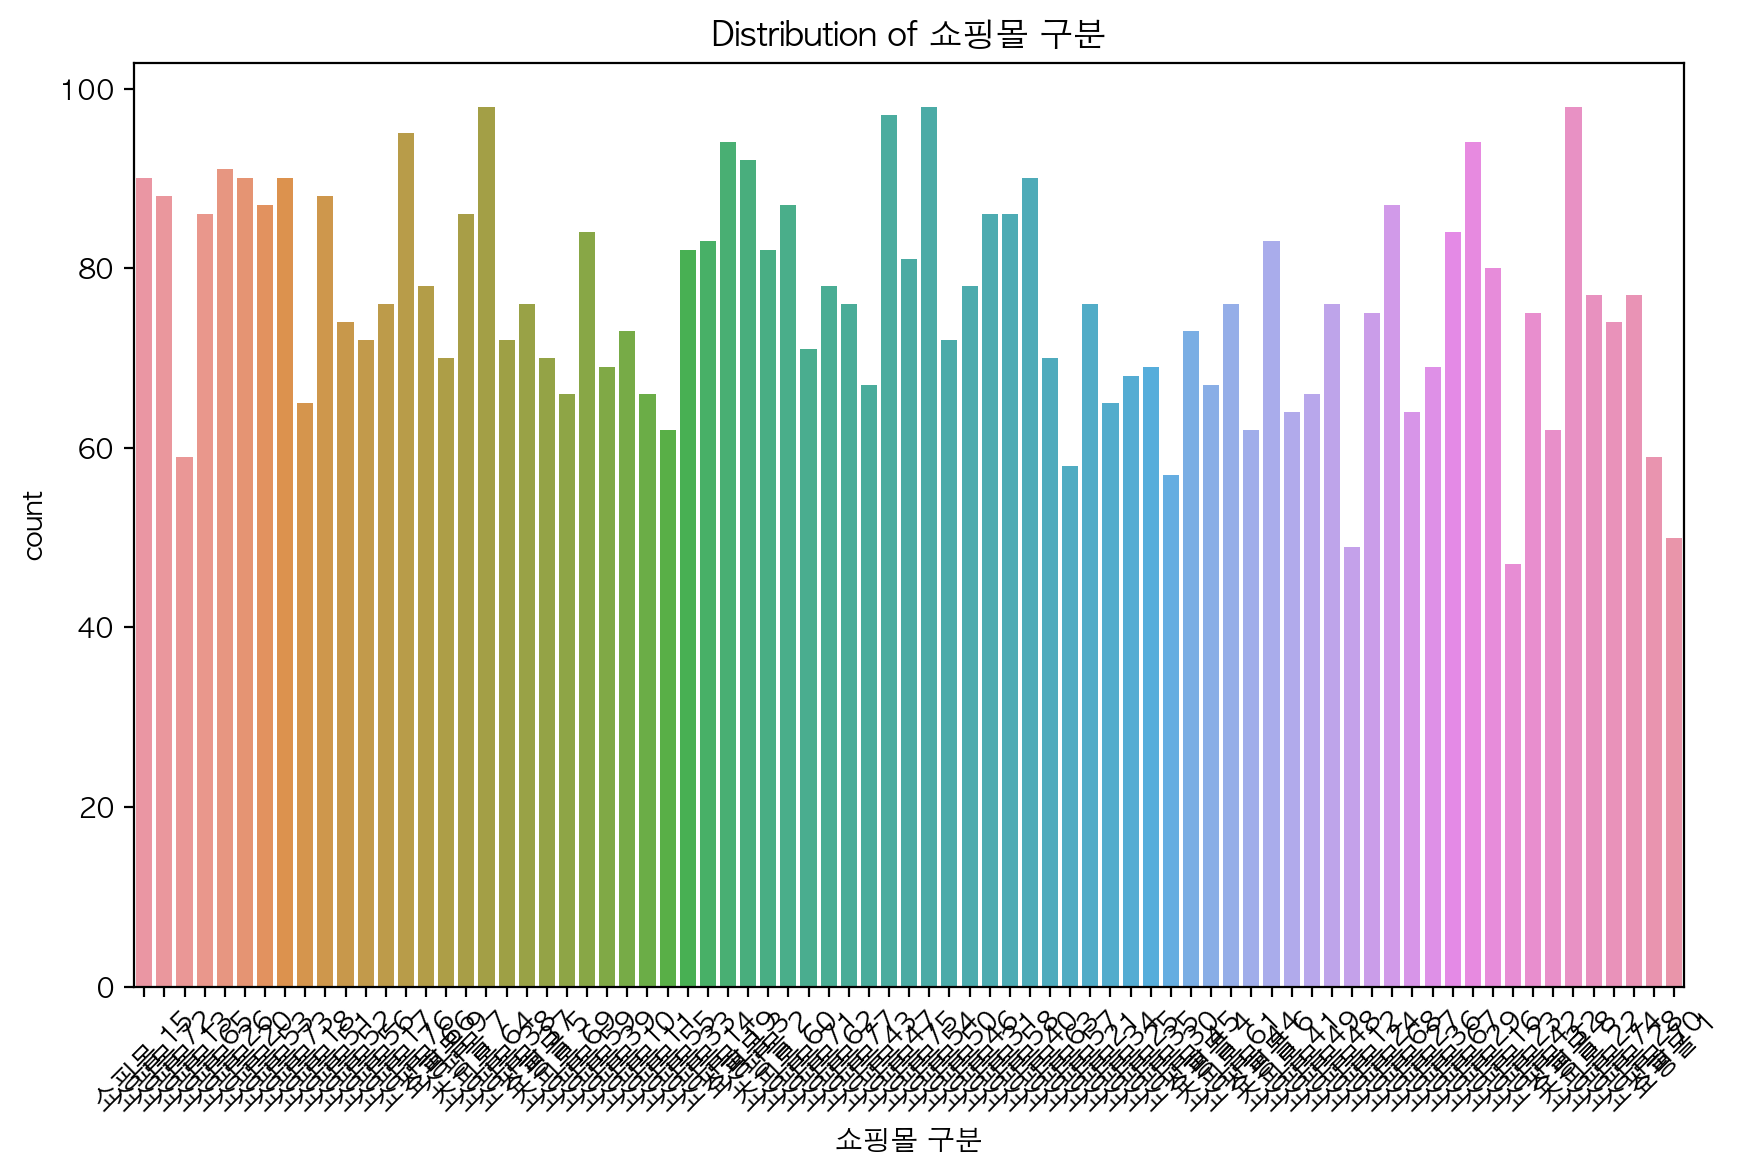

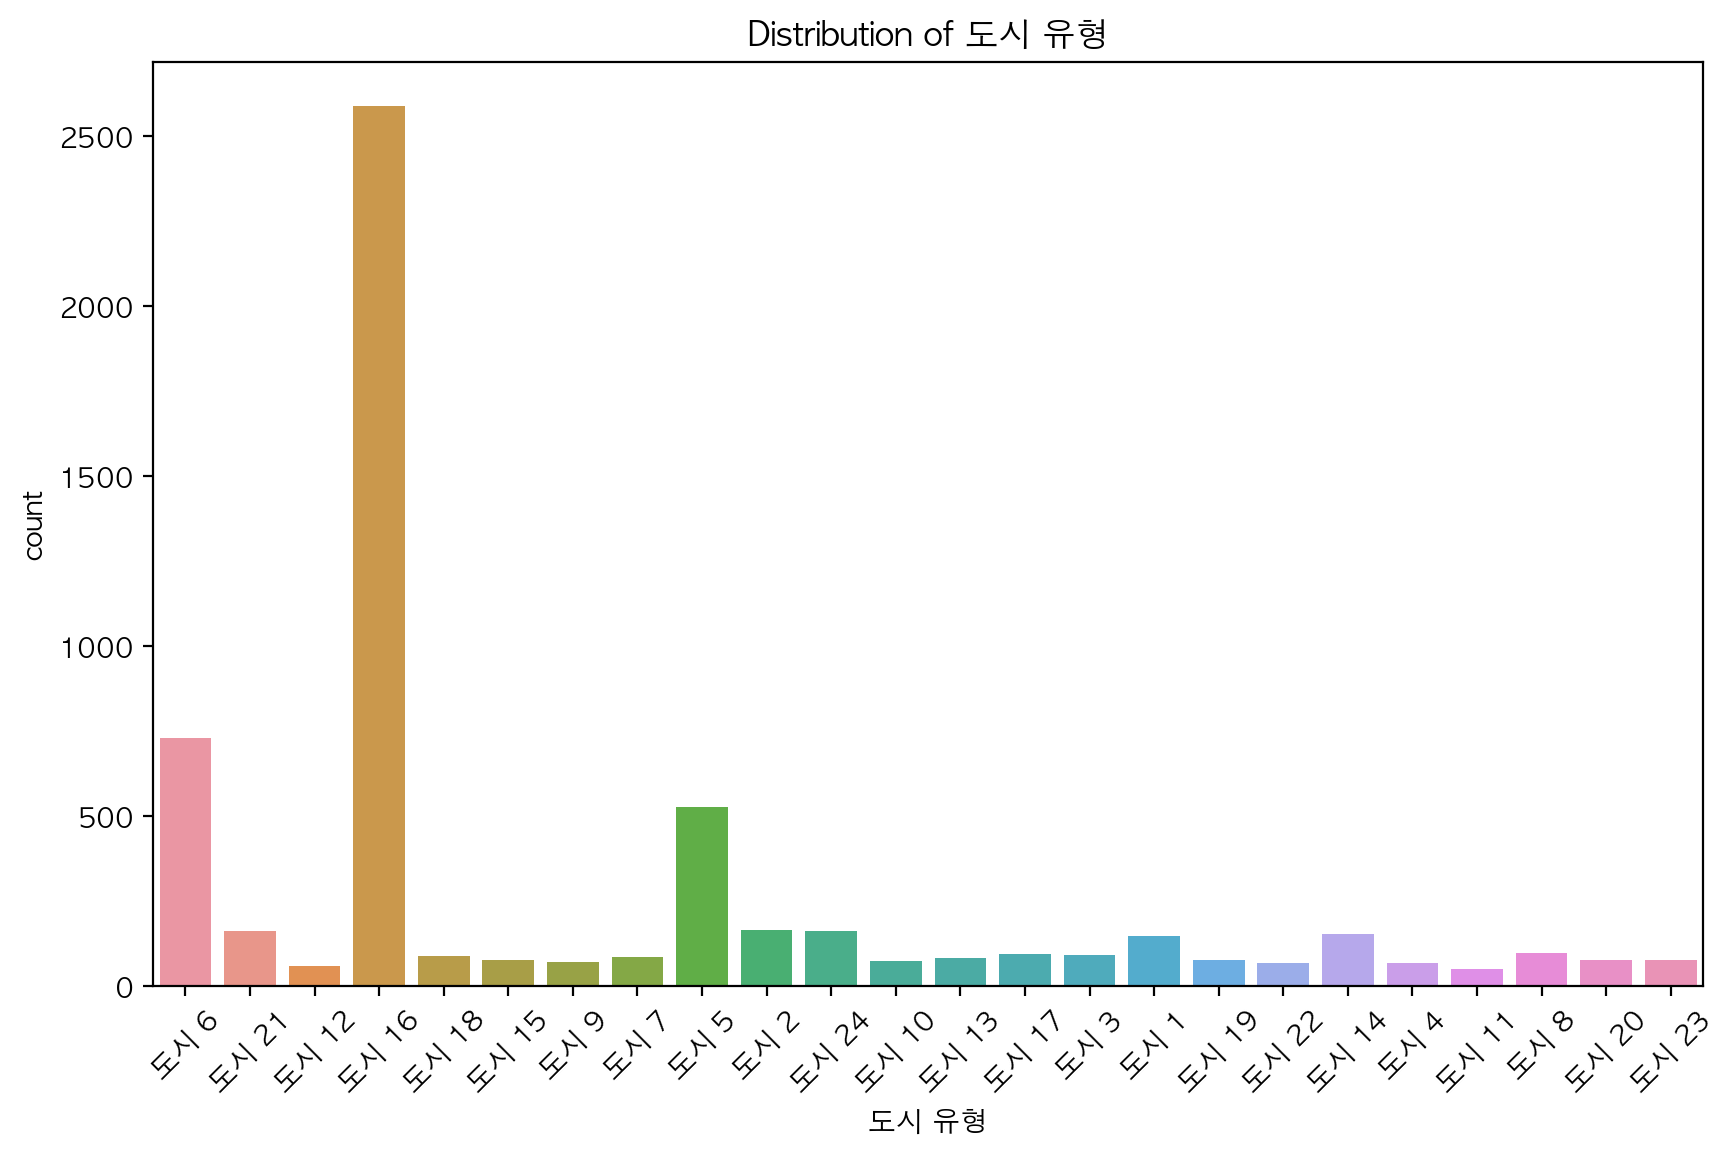

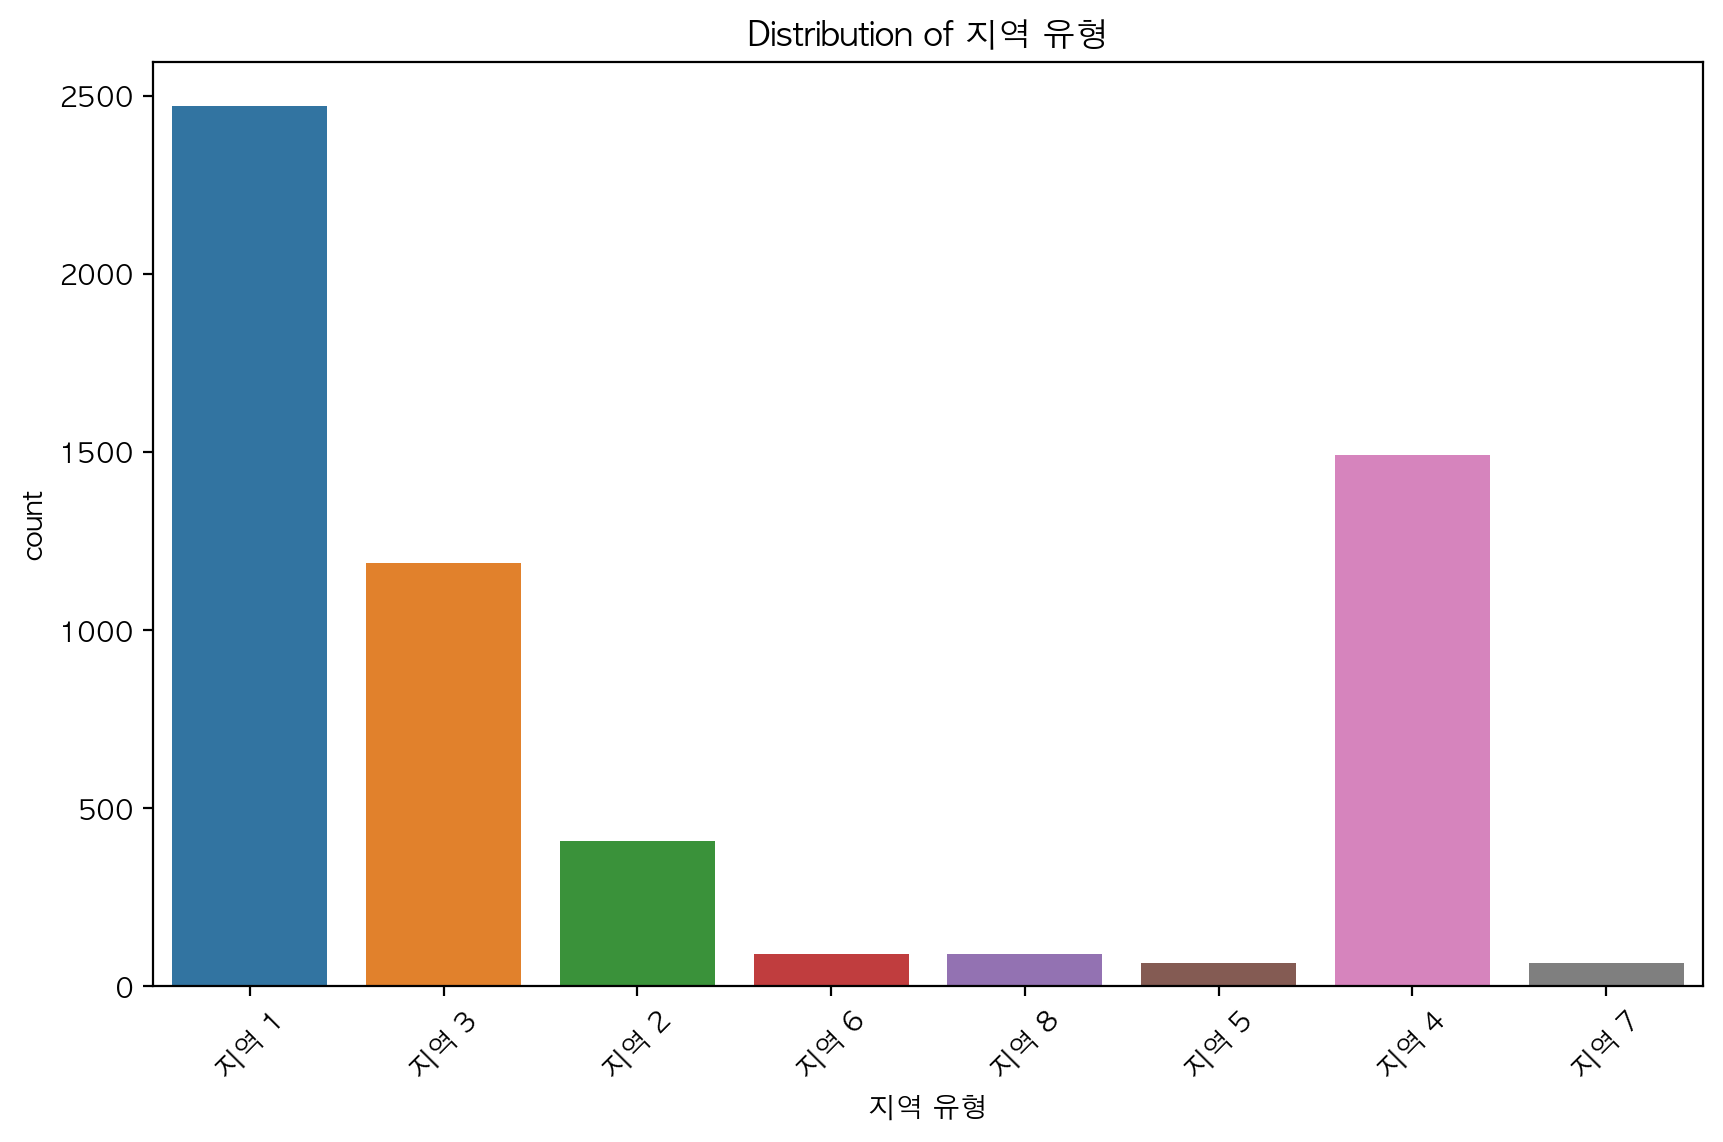

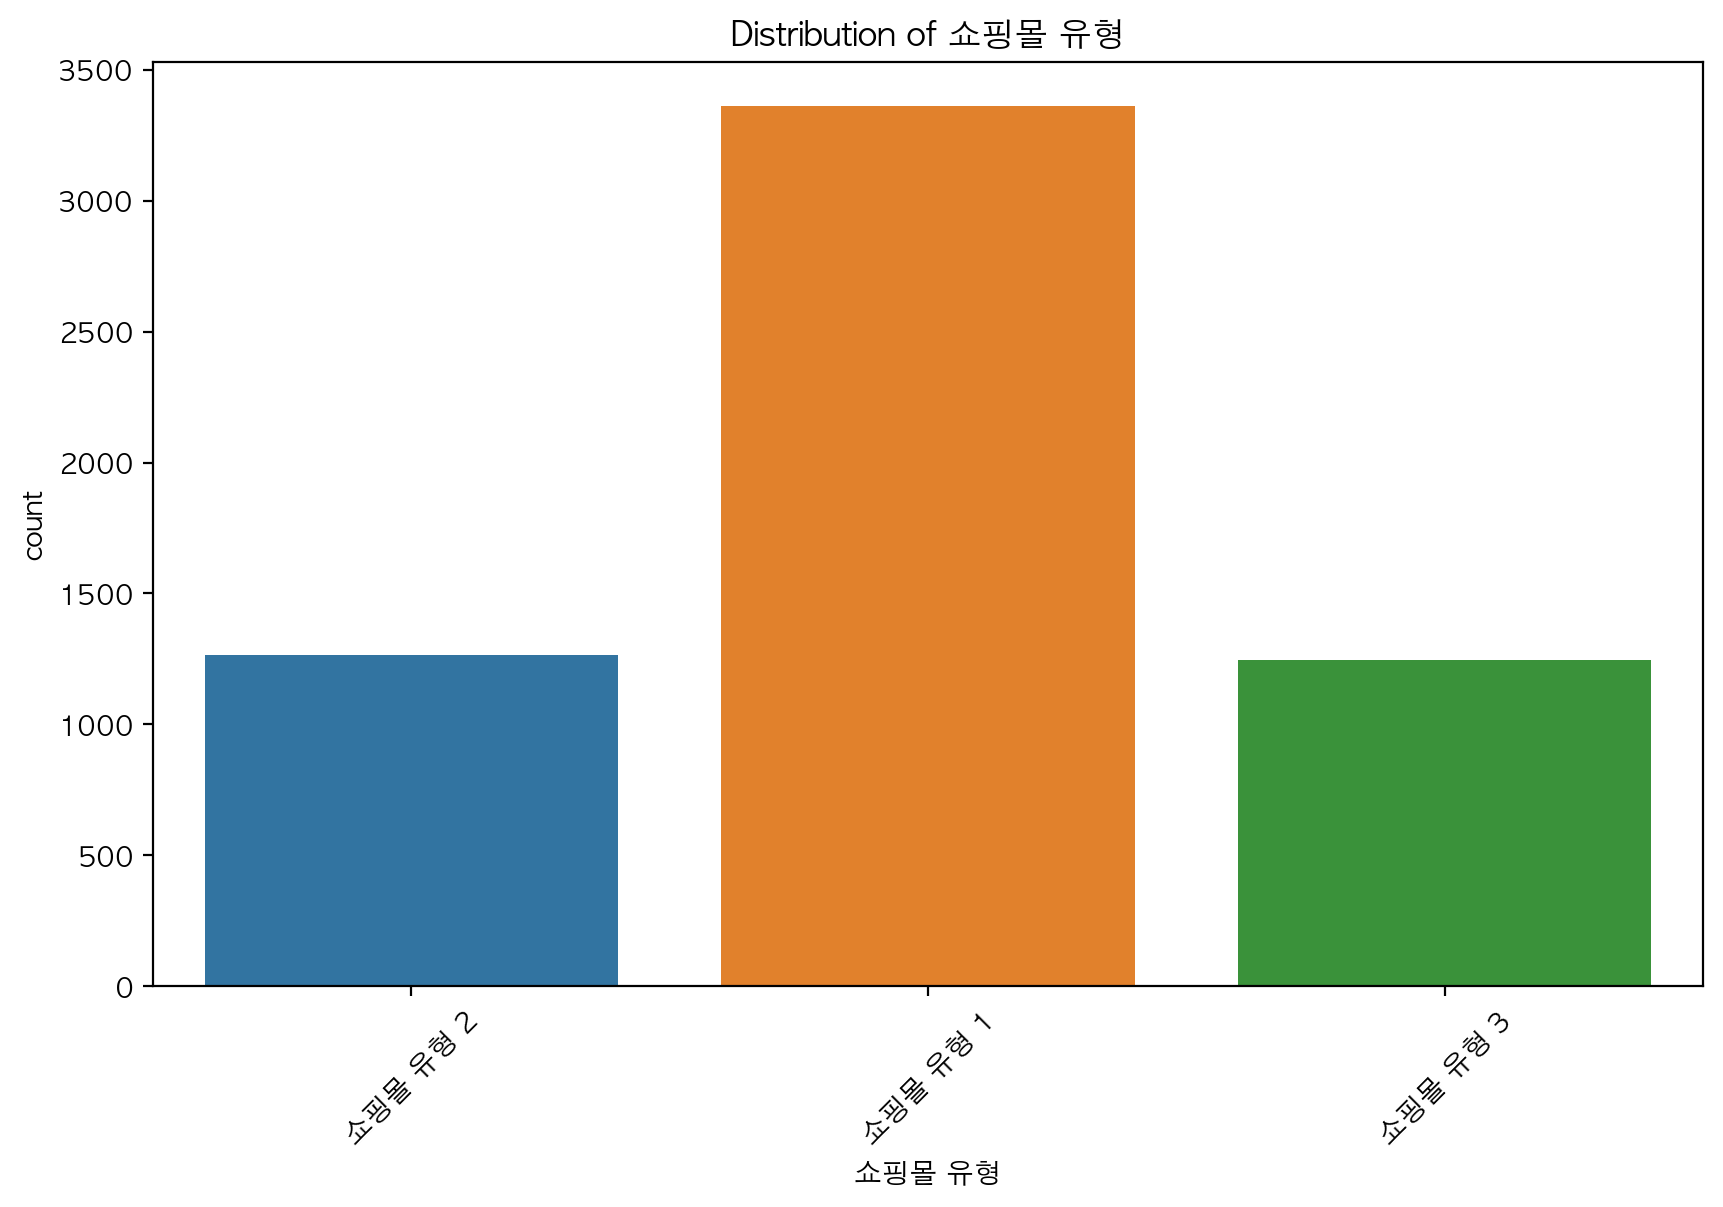

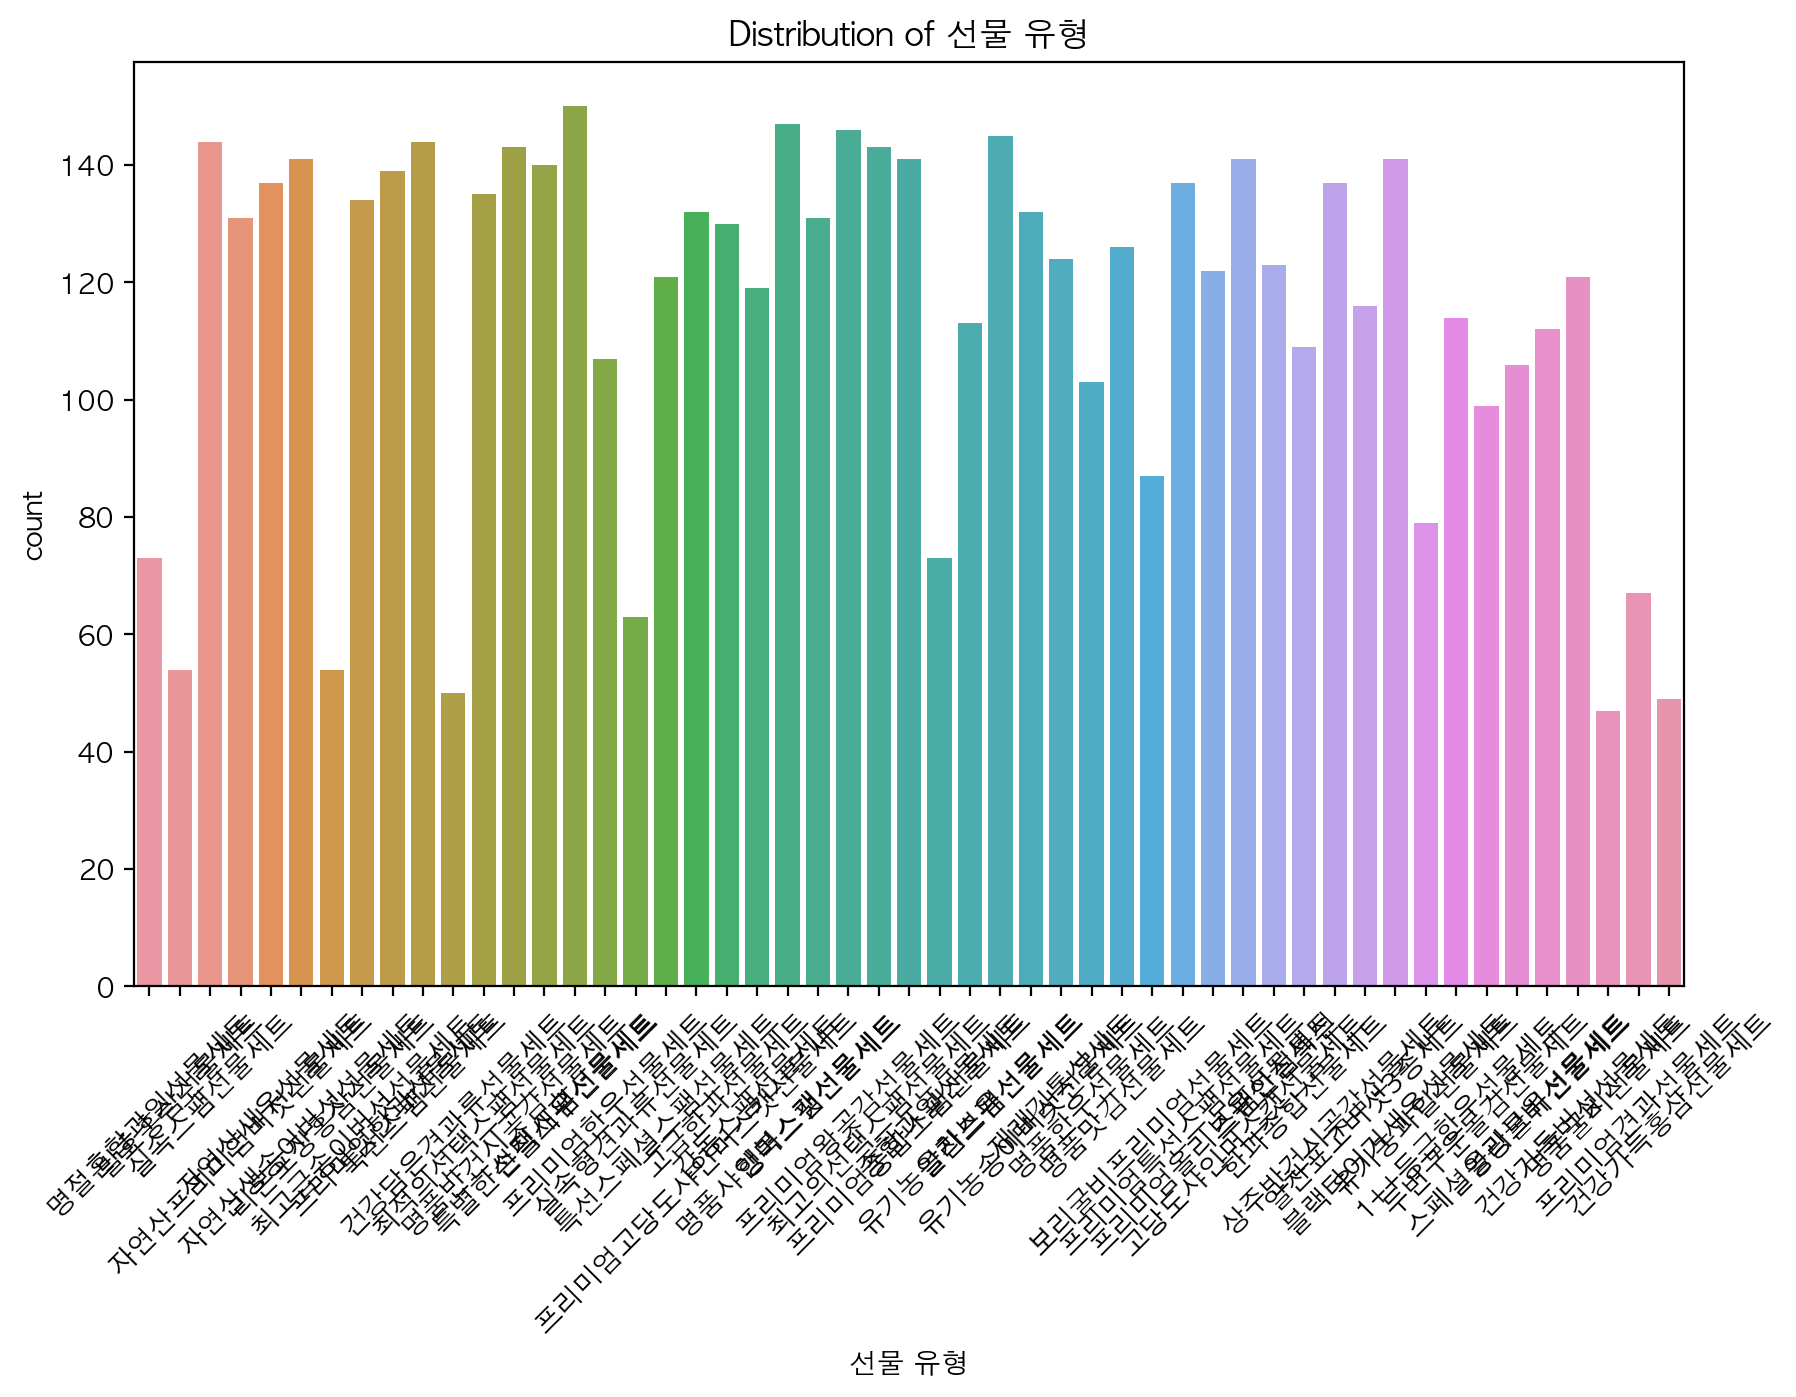

In [9]:
# 4. Distribution of Categorical Features
categorical_features = ["쇼핑몰 구분", "도시 유형", "지역 유형", "쇼핑몰 유형", "선물 유형"]
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=train_data, x=feature)
    plt.title(f"Distribution of {feature}")
    plt.xticks(rotation=45)
    plt.show()

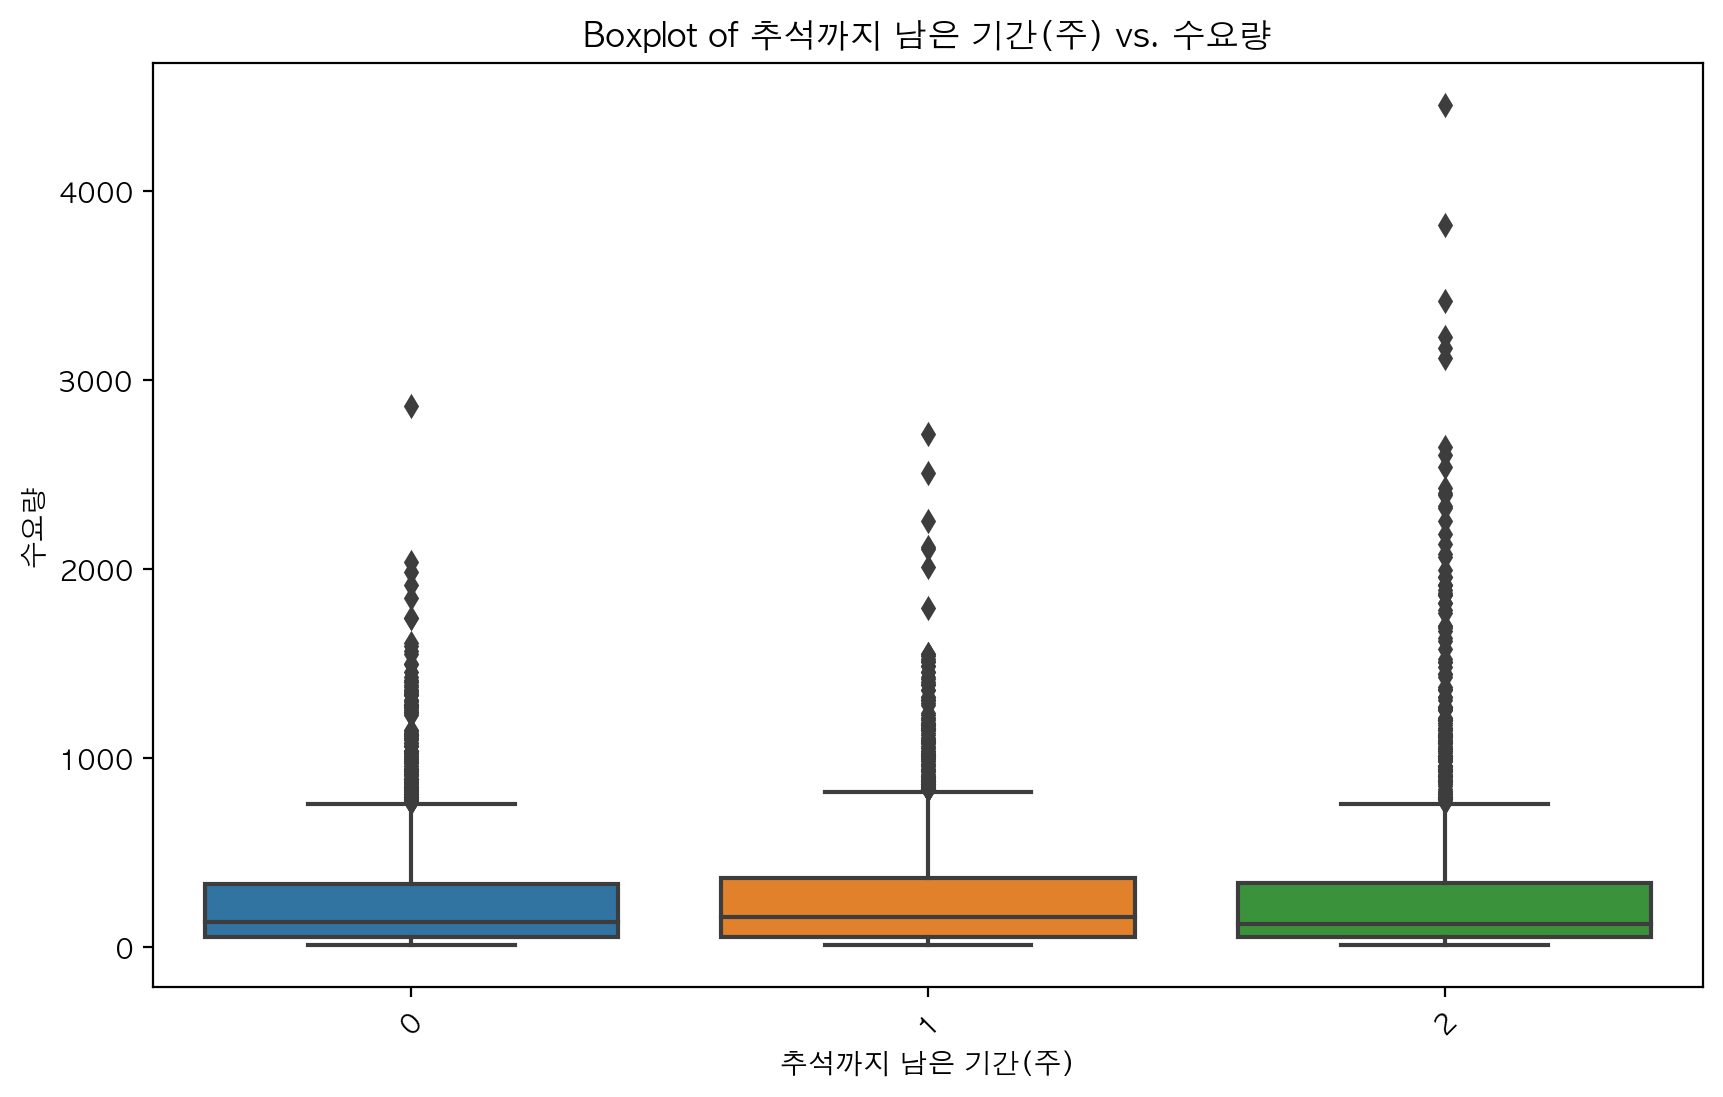

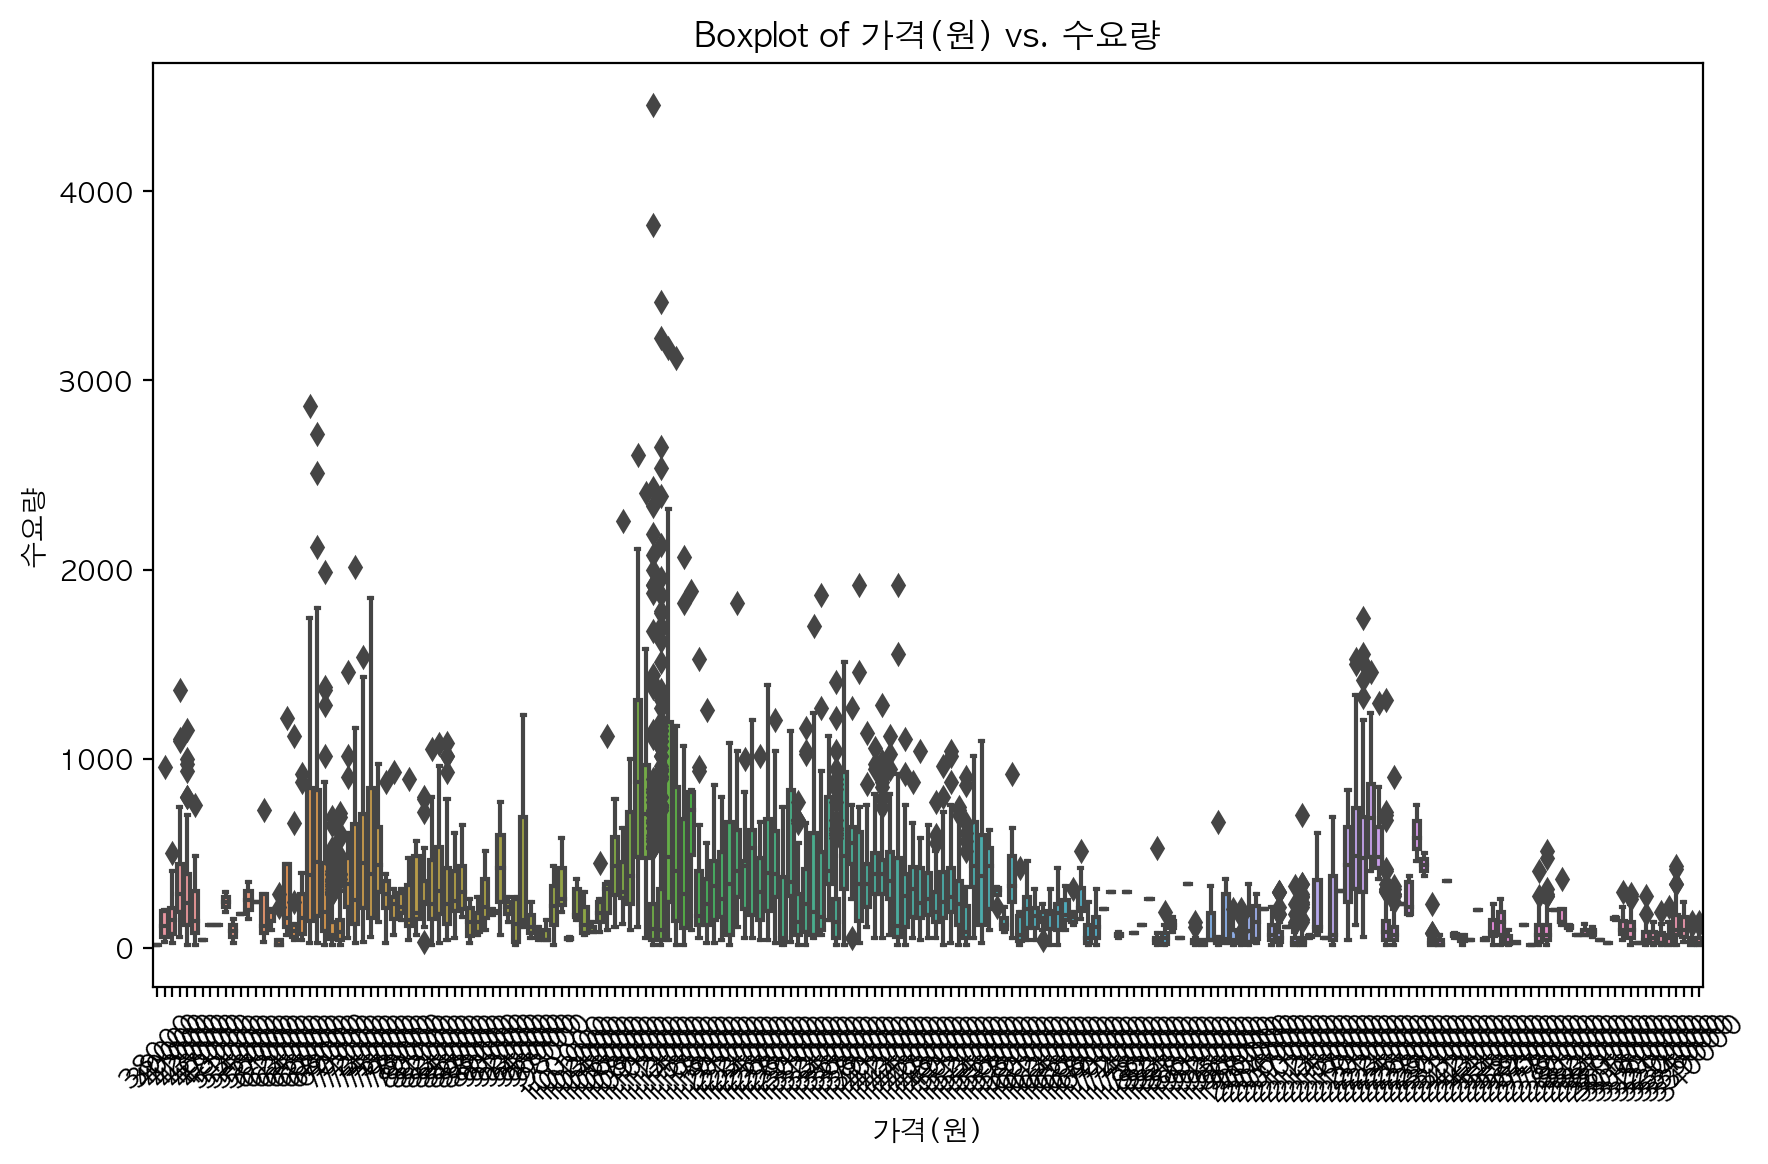

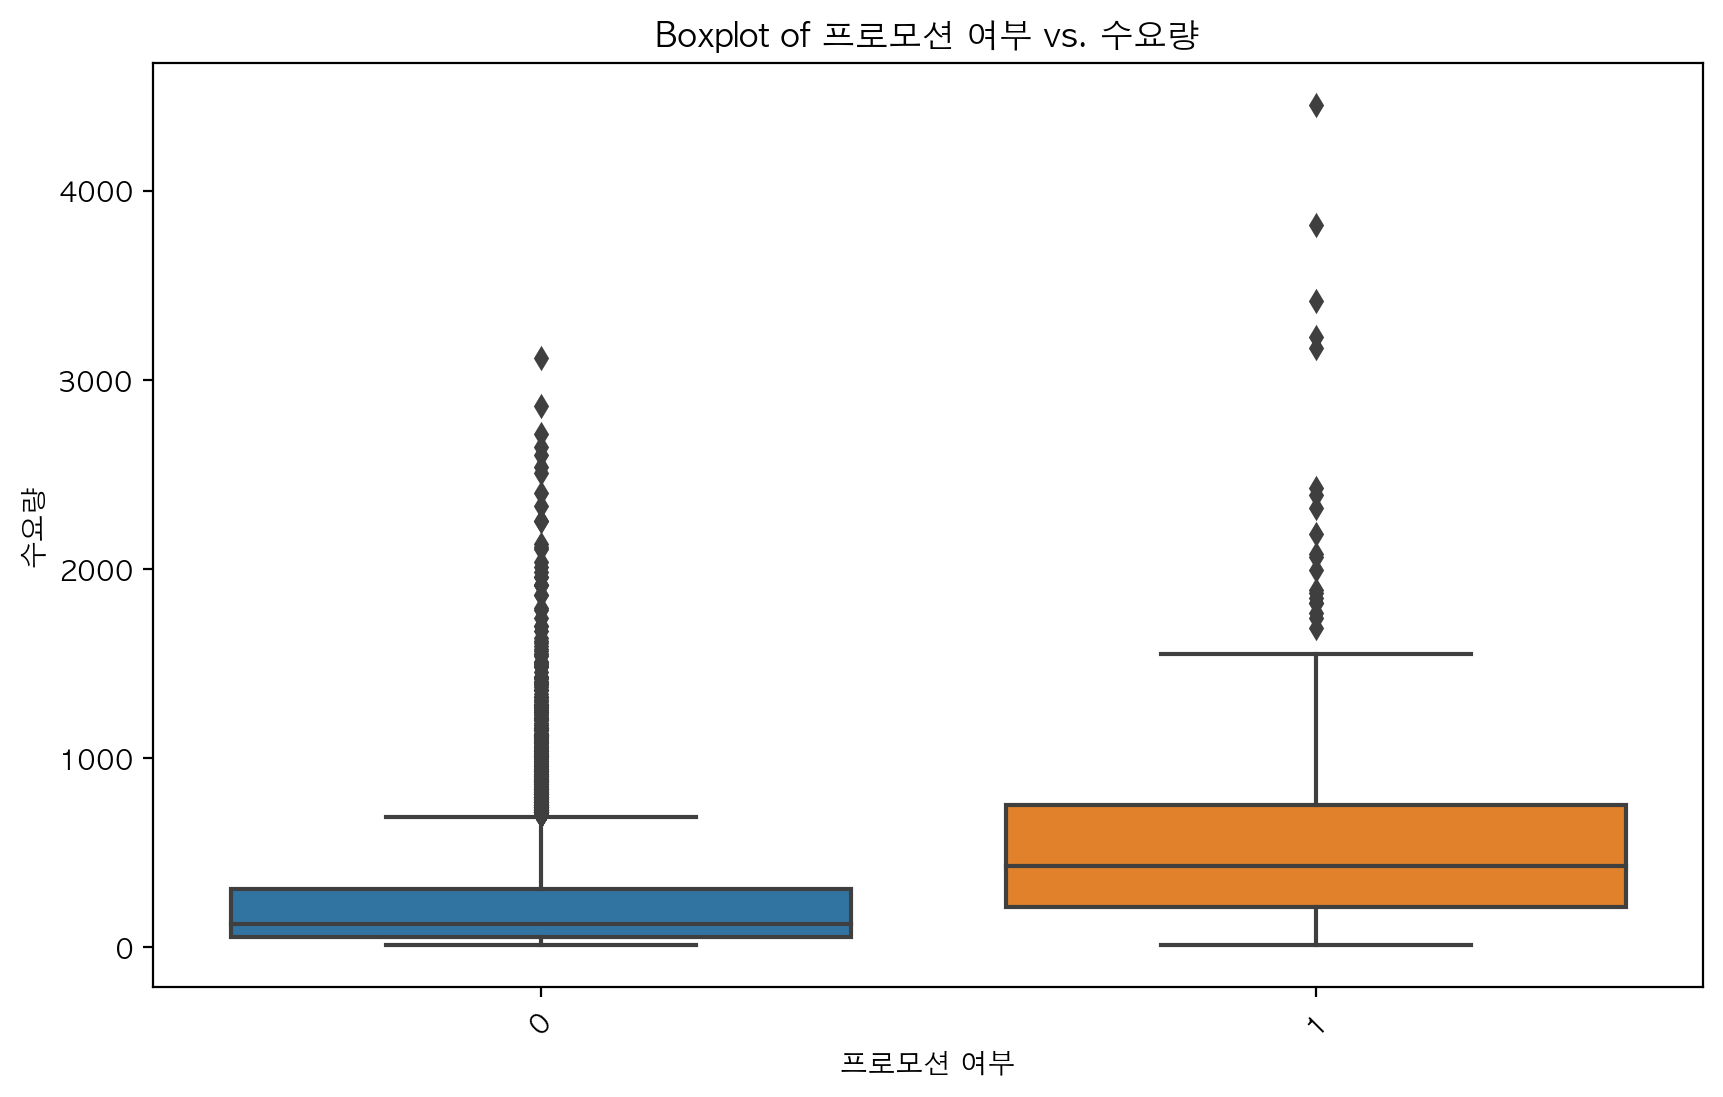

In [10]:
# 5. Boxplots for Numerical Features vs. Target Variable
numerical_features = train_data.select_dtypes(include=[np.number]).columns.tolist()
numerical_features.remove("수요량")  # Remove target variable
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=train_data, x=feature, y="수요량")
    plt.title(f"Boxplot of {feature} vs. 수요량")
    plt.xticks(rotation=45)
    plt.show()

In [11]:
# 6. Outliers Visualization (using Z-score for numerical features)
from scipy.stats import zscore

z_scores = zscore(train_data[numerical_features])
abs_z_scores = np.abs(z_scores)
outliers = (abs_z_scores > 3).all(axis=1)
print(f"Number of outliers: {outliers.sum()}")

Number of outliers: 0


In [12]:
# Display outliers
print(train_data[outliers])

Empty DataFrame
Columns: [ID, 추석까지 남은 기간(주), 쇼핑몰 구분, 가격(원), 프로모션 여부, 도시 유형, 지역 유형, 쇼핑몰 유형, 선물 유형, 수요량]
Index: []


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf

In [14]:
# Load data
train_data = pd.read_csv("./data/train.csv")

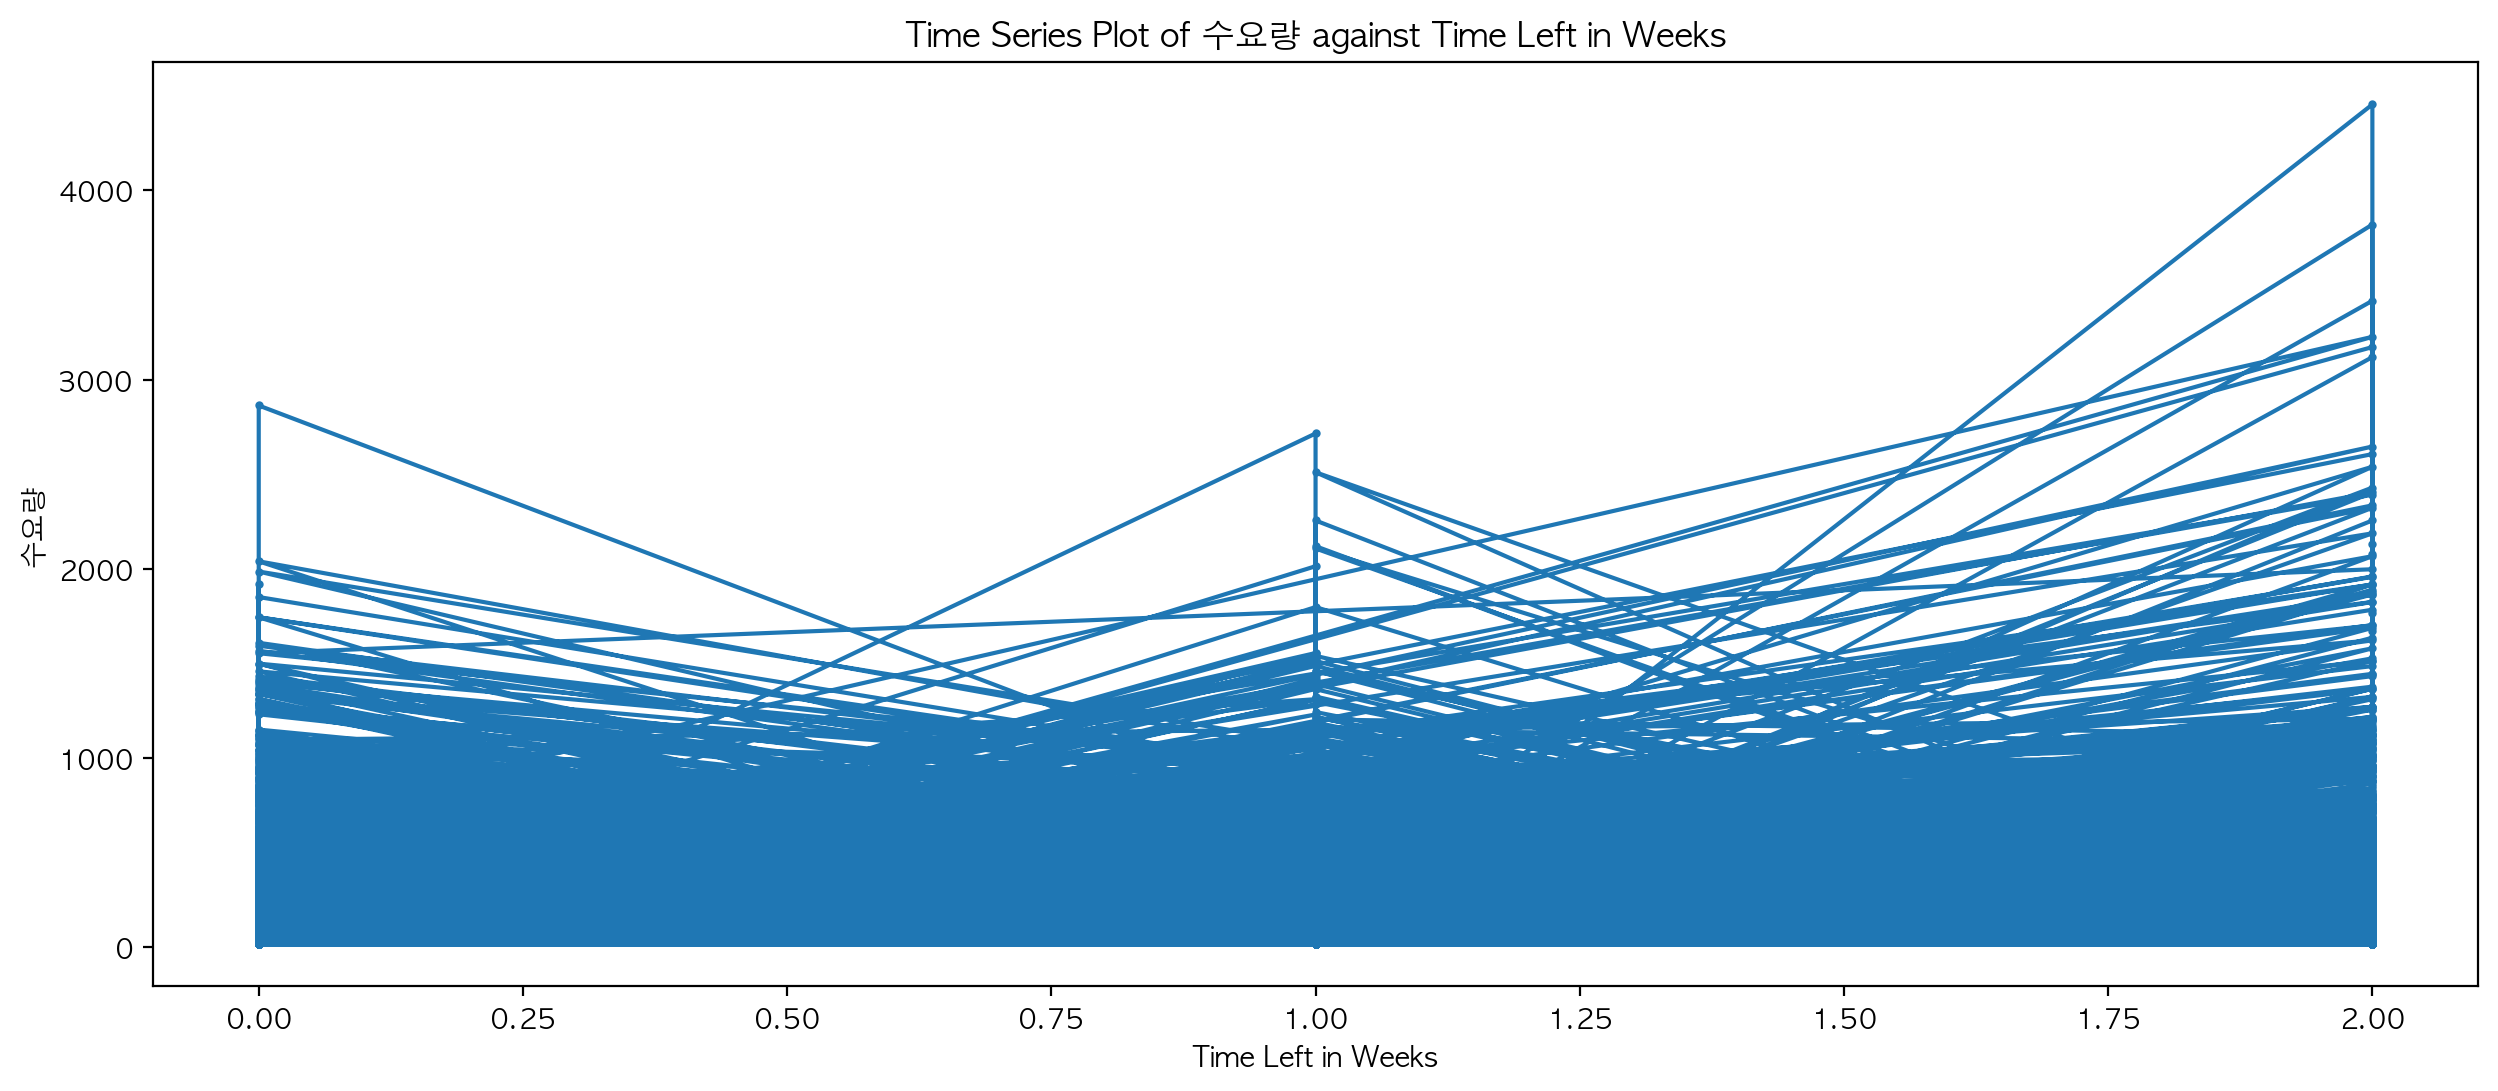

In [15]:
# 1. Visualize Time Series Data
plt.figure(figsize=(15, 6))
plt.plot(train_data["추석까지 남은 기간(주)"], train_data["수요량"], 'o-', markersize=2)
plt.title("Time Series Plot of 수요량 against Time Left in Weeks")
plt.xlabel("Time Left in Weeks")
plt.ylabel("수요량")
plt.show()

In [16]:
# 2. Aggregate Data
agg_data = train_data.groupby("추석까지 남은 기간(주)")["수요량"].mean().reset_index()

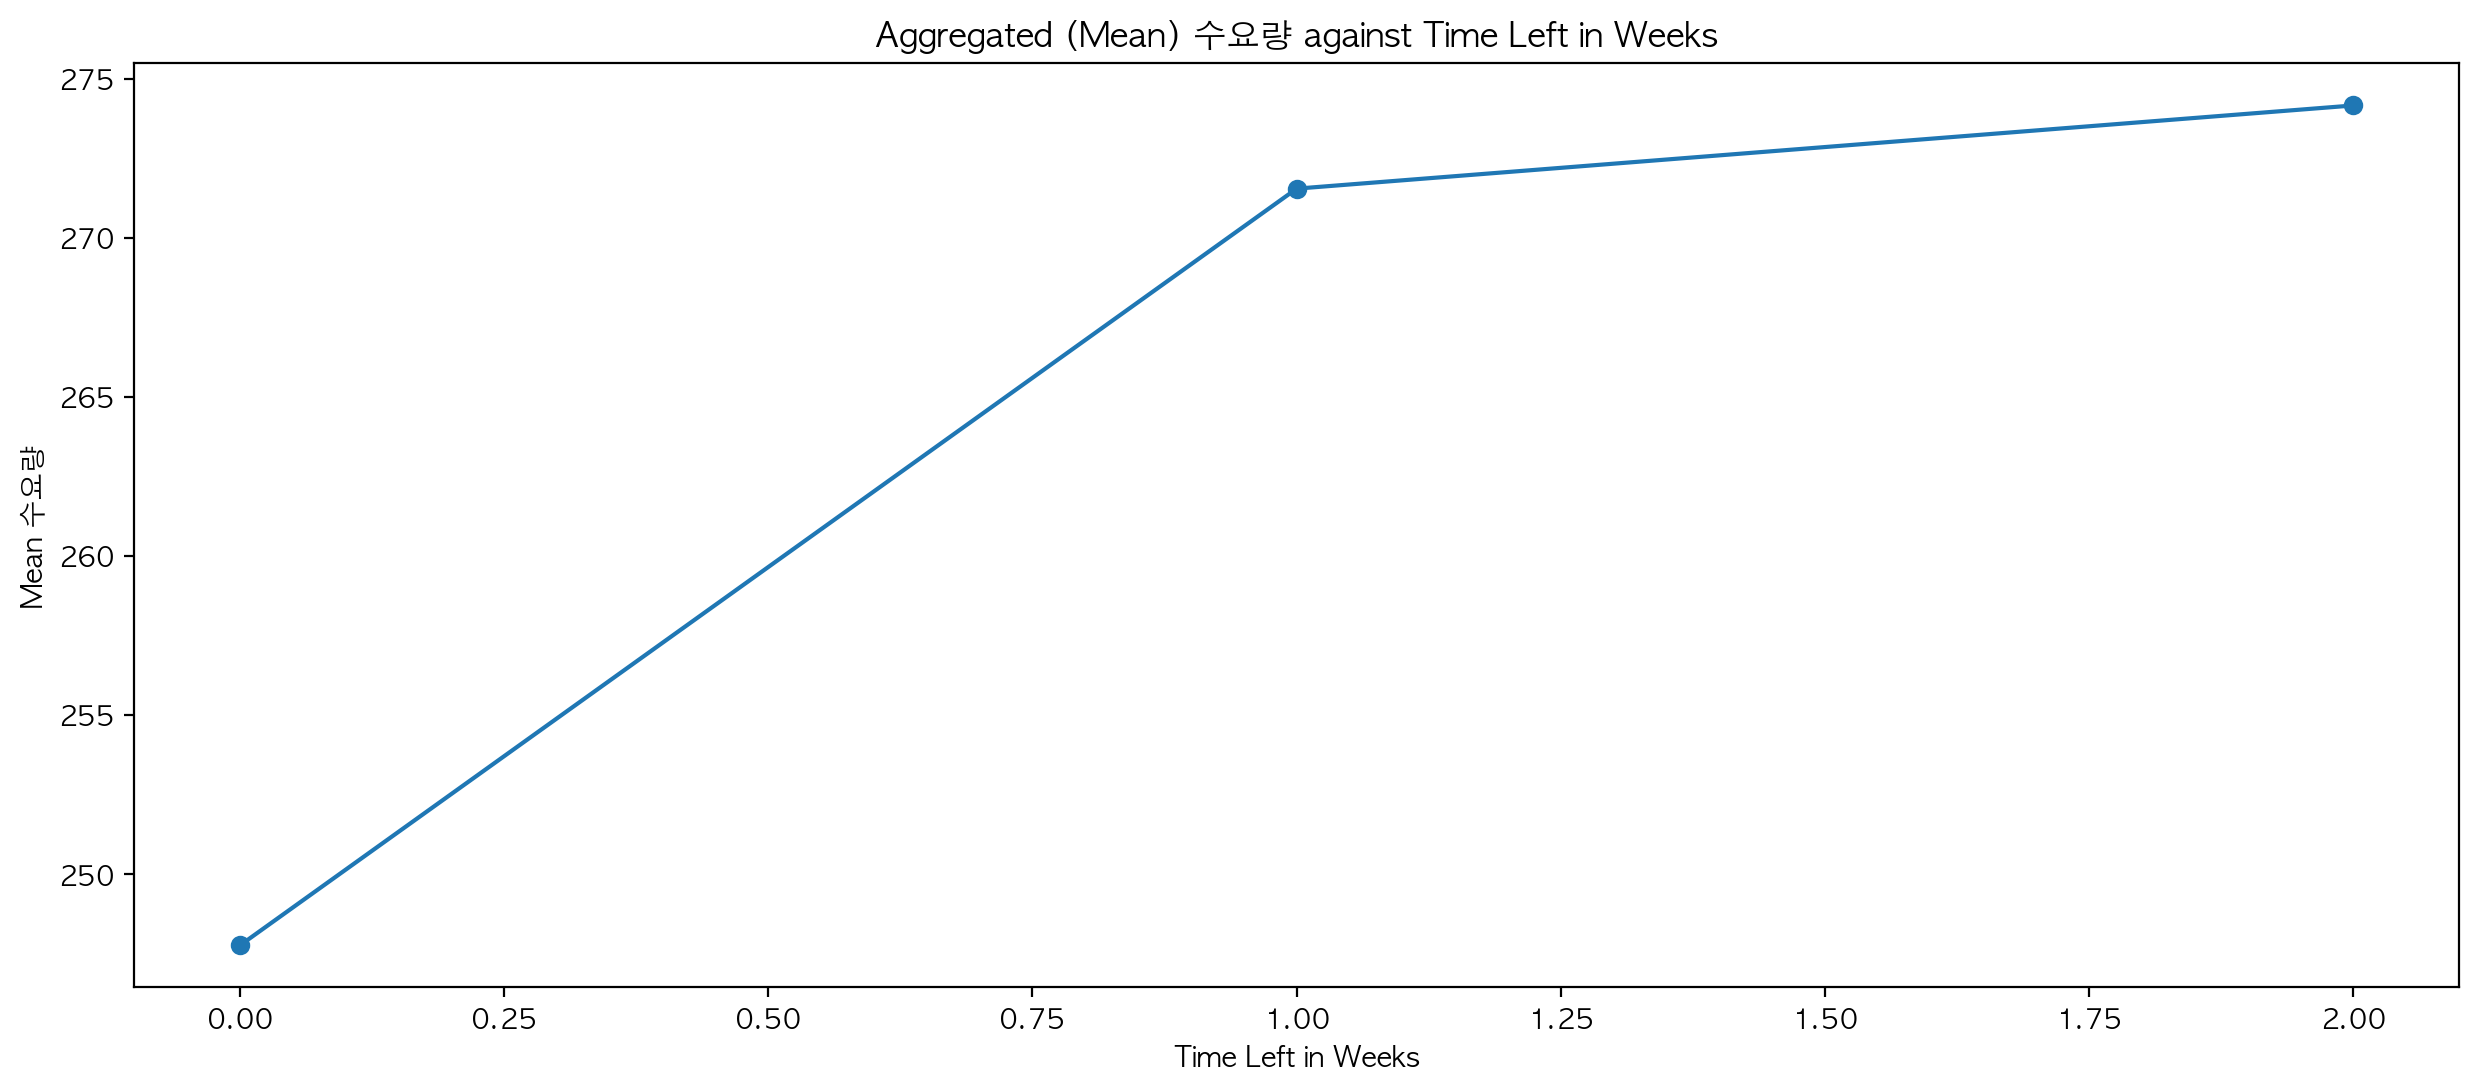

In [17]:
plt.figure(figsize=(15, 6))
plt.plot(agg_data["추석까지 남은 기간(주)"], agg_data["수요량"], 'o-')
plt.title("Aggregated (Mean) 수요량 against Time Left in Weeks")
plt.xlabel("Time Left in Weeks")
plt.ylabel("Mean 수요량")
plt.show()

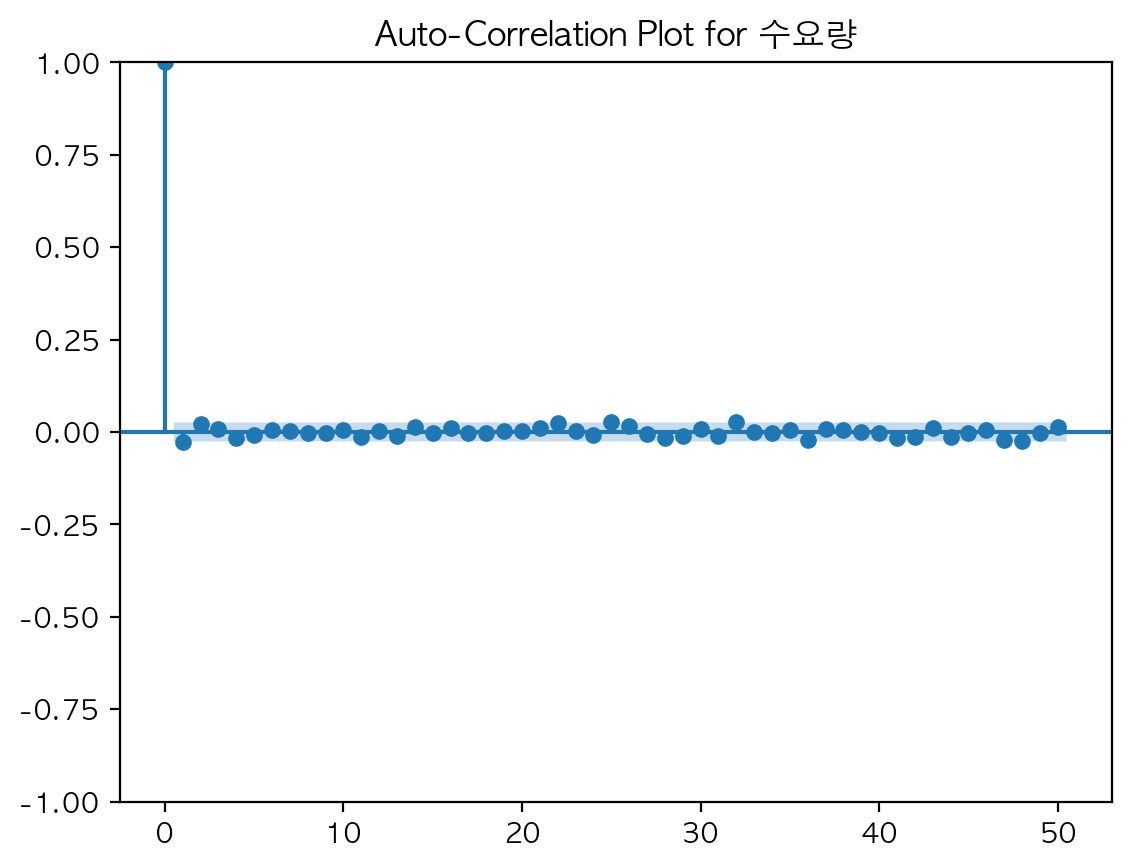

In [18]:
# 3. Auto-Correlation Plot (if weeks are sequential)
plot_acf(train_data["수요량"], lags=50)
plt.title("Auto-Correlation Plot for 수요량")
plt.show()